## 1. Binarization of grayscale image using Otsu algorithm

Estimated threshold (Otsu): 124.0


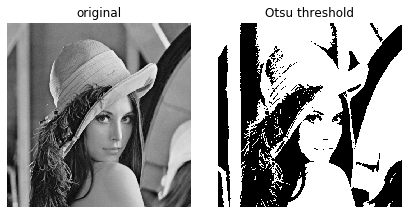

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./data/Lena.png', 0)

otsu_thr, otsu_mask = cv2.threshold(image, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', otsu_thr)

plt.figure(figsize=(6,3))
plt.subplot(121)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.title('original')
plt.imshow(image, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.title('Otsu threshold')
plt.imshow(otsu_mask, cmap='gray')
plt.tight_layout()
plt.show()

## 2. Finding external and internal contours in binary image

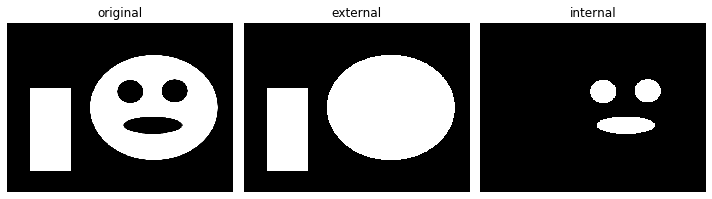

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./data/BnW.png', 0)

contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

image_external = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image_external, contours, i, 255, -1)
        
image_internal = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 255, -1)
        
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.title('original')
plt.imshow(image, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.title('external')
plt.imshow(image_external, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.title('internal')
plt.imshow(image_internal, cmap='gray')

plt.tight_layout()
plt.show()

## 3. Extracting connected components from binary image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


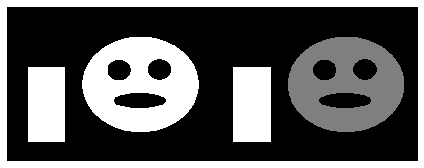

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/BnW.png', cv2.IMREAD_GRAYSCALE)

connectivity = 8
num_labels, labelmap = cv2.connectedComponents(img, connectivity, cv2.CV_32S)

img = np.hstack((img, labelmap.astype(np.float32)/(num_labels - 1)))
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

#cv2.imshow('Connected components', img)
#cv2.waitKey()
#cv2.destroyAllWindows()

img = cv2.imread('./data/Lena.png', cv2.IMREAD_GRAYSCALE)
otsu_thr, otsu_mask = cv2.threshold(img, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

output = cv2.connectedComponentsWithStats(otsu_mask, connectivity, cv2.CV_32S)

num_labels, labelmap, stats, centers = output

colored = np.full((img.shape[0], img.shape[1], 3), 0, np.uint8)

for l in range(1, num_labels):
    if stats[l][4] > 200:
        colored[labelmap == l] = (0, 255*l/num_labels, 255*num_labels/l)
        cv2.circle(colored, 
                   (int(centers[l][0]), int(centers[l][1])), 5, (255, 0, 0), cv2.FILLED)
        
img = cv2.cvtColor(otsu_mask*255, cv2.COLOR_GRAY2BGR)

cv2.imshow('Connected components', np.hstack((img, colored)))
cv2.waitKey()
cv2.destroyAllWindows()

## 4. Fitting lines and circles into 2d point sets

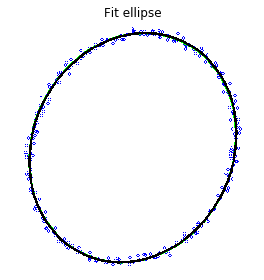

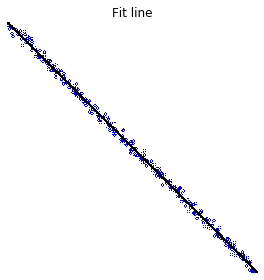

In [4]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

img = np.full((512, 512, 3), 255, np.uint8)

axes = (int(256*random.uniform(0, 1)), int(256*random.uniform(0, 1)))
angle = int(180*random.uniform(0, 1))
center = (256, 256)

pts = cv2.ellipse2Poly(center, axes, angle, 0, 360, 1)
pts += np.random.uniform(-10, 10, pts.shape).astype(np.int32)

cv2.ellipse(img, center, axes, angle, 0, 360, (0, 255, 0), 3)

for pt in pts:
    cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0, 0, 255))

cv2.imshow('Fit ellipse', img)
cv2.waitKey()
cv2.destroyAllWindows()

ellipse = cv2.fitEllipse(pts)
cv2.ellipse(img, ellipse, (0, 0, 0), 3)

cv2.imshow('Fit ellipse', img)
cv2.waitKey()
cv2.destroyAllWindows()

plt.axis('off')
plt.title('Fit ellipse')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(img)
plt.show()

img = np.full((512, 512, 3), 255, np.uint8)

pts = np.arange(512).reshape(-1, 1)
pts = np.hstack((pts, pts))
pts += np.random.uniform(-10, 10, pts.shape).astype(np.int32)

cv2.line(img, (0,0), (512, 512), (0, 255, 0), 3)

for pt in pts:
    cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0, 0, 255))

cv2.imshow('Fit line', img)
cv2.waitKey()
cv2.destroyAllWindows()

vx,vy,x,y = cv2.fitLine(pts, cv2.DIST_L2, 0, 0.01, 0.01)
y0 = int(y - x*vy/vx)
y1 = int((512 - x)*vy/vx + y)
cv2.line(img, (0, y0), (512, y1), (0, 0, 0), 3)

cv2.imshow('Fit line', img)
cv2.waitKey()
cv2.destroyAllWindows()

plt.axis('off')
plt.title('Fit line')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(img)
plt.show()

## 5. Calculating image moments

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = np.zeros((480, 640), np.uint8)
cv2.ellipse(image, (320, 240), (200, 100), 0, 0, 360, 255, -1)

m = cv2.moments(image)
for name, val in m.items():
    print(name, '\t', val)
    
print('\nCenter X estimated:', m['m10'] / m['m00'])
print('Center Y estimated:', m['m01'] / m['m00'])

m00 	 16119315.0
m10 	 5158101240.0
m01 	 3868620810.0
m20 	 1812142855350.0
m11 	 1237939564800.0
m02 	 969157708320.0
m30 	 683285449618080.0
m21 	 434912202354750.0
m12 	 310125260718570.0
m03 	 252129278267070.0
mu20 	 161575917357.31616
mu11 	 -72.9990234375
mu02 	 40692263506.42969
mu30 	 1687957749.125
mu21 	 -420182048.71875
mu12 	 -422443285.20703125
mu03 	 105694127.71875
nu20 	 0.0006218468887998859
nu11 	 -2.809466679966455e-13
nu02 	 0.00015660970937729079
nu30 	 1.618061841335058e-09
nu21 	 -4.0278291313762605e-10
nu12 	 -4.049505150683136e-10
nu03 	 1.013174855849065e-10

Center X estimated: 319.9950643063927
Center Y estimated: 239.999082467214


## 6. Working with curves_ appoximation, length and area

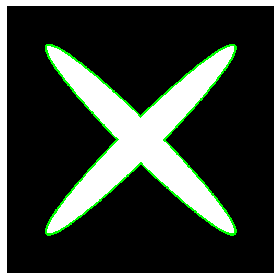

Area of contour is 47474.00
Signed area of contour is -47474.00
Signed area of contour is 47474.00
Length of closed contour is 1905.29
Length of open contour is 1897.29
Convex status of contour is False
Convex status of its hull is True


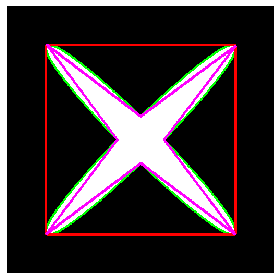

In [6]:
import cv2, random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/bw.png', cv2.IMREAD_GRAYSCALE)

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color, contours, -1, (0,255,0), 3)

image = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

contour = contours[0]

print('Area of contour is %.2f' % cv2.contourArea(contour))
print('Signed area of contour is %.2f' % cv2.contourArea(contour, True))
print('Signed area of contour is %.2f' % cv2.contourArea(contour[::-1], True))

print('Length of closed contour is %.2f' % cv2.arcLength(contour, True))
print('Length of open contour is %.2f' % cv2.arcLength(contour, False))

hull = cv2.convexHull(contour)
cv2.drawContours(color, [hull], -1, (0,0,255), 3)

cv2.imshow('contours', color)
cv2.waitKey()
cv2.destroyAllWindows()

print('Convex status of contour is %s' % cv2.isContourConvex(contour))
print('Convex status of its hull is %s' % cv2.isContourConvex(hull))

cv2.namedWindow('contours')

img = np.copy(color)

def trackbar_callback(value):
    global img
    epsilon = value*cv2.arcLength(contour, True)*0.1/255
    approx = cv2.approxPolyDP(contour, epsilon, True)
    img = np.copy(color)
    cv2.drawContours(img, [approx], -1, (255,0,255), 3)

cv2.createTrackbar('Epsilon', 'contours', 1, 255, lambda v: trackbar_callback(v))
while True:
    cv2.imshow('contours', img)
    key = cv2.waitKey(3)
    if key == 27: #ESC
        break

cv2.destroyAllWindows()

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

## 7. Checking if point is within contour or not

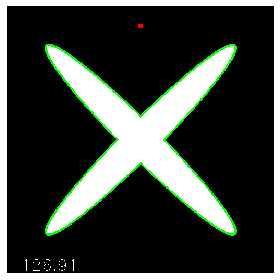

In [7]:
import cv2, random
import numpy as np

img = cv2.imread('./data/bw.png', cv2.IMREAD_GRAYSCALE)

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color, contours, -1, (0,255,0), 3)

cv2.imshow('contours', color)
cv2.waitKey()
cv2.destroyAllWindows()

contour = contours[0]
image_to_show = np.copy(color)
measure = True

def mouse_callback(event, x, y, flags, param):    
    global contour, image_to_show
    
    if event == cv2.EVENT_LBUTTONUP:
        distance = cv2.pointPolygonTest(contour, (x,y), measure)
        image_to_show = np.copy(color)
        if distance > 0:
            pt_color = (0, 255, 0)
        elif distance < 0:
            pt_color = (0, 0, 255) 
        else:
            pt_color = (128, 0, 128)
        cv2.circle(image_to_show, (x,y), 5, pt_color, -1)
        cv2.putText(image_to_show, '%.2f' % distance, (0, image_to_show.shape[1] - 5), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
        
cv2.namedWindow('contours')
cv2.setMouseCallback('contours', mouse_callback)

while(True):
    cv2.imshow('contours', image_to_show)
    k = cv2.waitKey(1)

    if k == ord('m'): # cv2.pointPolygonTest
        measure = not measure
    elif k == 27: #ESC
        break

cv2.destroyAllWindows()

image = cv2.cvtColor(image_to_show, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

## 8. Computing distance to 2d point set from every pixel

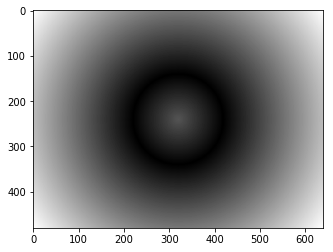

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = np.full((480, 640), 255, np.uint8)
cv2.circle(image, (320, 240), 100, 0)

distmap = cv2.distanceTransform(image, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)

plt.figure()
plt.imshow(distmap, cmap='gray')
plt.show()

## 9. Image segmentation using k-means algorithm

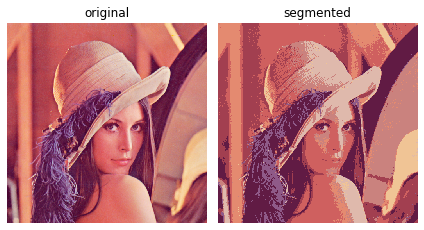

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./data/Lena.png').astype(np.float32) / 255.
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

data = image_lab.reshape((-1, 3))

num_classes = 8
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.1)
_, labels, centers = cv2.kmeans(data, num_classes, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

segmented_lab = centers[labels.flatten()].reshape(image.shape)
segmented = cv2.cvtColor(segmented_lab, cv2.COLOR_Lab2RGB)

plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.xticks([]), plt.yticks([])
plt.imshow(image[:, :, [2, 1, 0]])

plt.subplot(122)
plt.axis('off')
plt.title('segmented')
plt.xticks([]), plt.yticks([])
plt.imshow(segmented)
plt.tight_layout()
plt.show()

## 10. Image segmentation using segment seeds_ watershed algorithm

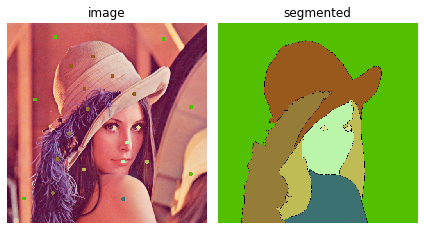

In [12]:
import cv2
import numpy as np
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/Lena.png')
show_img = np.copy(img)

seeds = np.full(img.shape[0:2], 0, np.int32)
segmentation = np.full(img.shape, 0, np.uint8)

n_seeds = 9

colors = []
for m in range(n_seeds):
    colors.append((255 * m / n_seeds, randint(0, 255), randint(0, 255)))

mouse_pressed = False
current_seed = 1
seeds_updated = False

def mouse_callback(event, x, y, flags, param):
    global mouse_pressed, seeds_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        cv2.circle(seeds, (x, y), 5, (current_seed), cv2.FILLED)
        cv2.circle(show_img, (x, y), 5, colors[current_seed - 1], cv2.FILLED)
        seeds_updated = True

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            cv2.circle(seeds, (x, y), 5, (current_seed), cv2.FILLED)
            cv2.circle(show_img, (x, y), 5, colors[current_seed - 1], cv2.FILLED)
            seeds_updated = True

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True: #Press the numeric keys to change the seed
    cv2.imshow('segmentation', segmentation)
    cv2.imshow('image', show_img)
        
    k = cv2.waitKey(1)

    if k == 27:
        break
    elif k == ord('c'):
        show_img = np.copy(img)
        seeds = np.full(img.shape[0:2], 0, np.int32)
        segmentation = np.full(img.shape, 0, np.uint8)
    elif k > 0 and chr(k).isdigit():
        n = int(chr(k))
        if 1 <= n <= n_seeds and not mouse_pressed:
            current_seed = n
    
    if seeds_updated and not mouse_pressed:        
        seeds_copy = np.copy(seeds)
        cv2.watershed(img, seeds_copy)
        segmentation = np.full(img.shape, 0, np.uint8)
        for m in range(n_seeds):
            segmentation[seeds_copy == (m + 1)] = colors[m]
        
        seeds_updated = False
        
cv2.destroyAllWindows()

plt.subplot(121)
plt.axis('off')
plt.title('image')
plt.xticks([]), plt.yticks([])
image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

plt.subplot(122)
plt.axis('off')
plt.title('segmented')
plt.xticks([]), plt.yticks([])
image = cv2.cvtColor(segmentation, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.tight_layout()
plt.show()